In [4]:
import torch
import torch.optim as optim

C:\Users\koumi\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import numpy as np

In [6]:
n_input = 5
n_output = 5
n_hidden = 128

In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input,n_hidden)
        self.l2 = torch.nn.Linear(n_hidden,n_output)

        self.relu = torch.nn.ReLU(inplace=True)
    
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [8]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

In [9]:
net = Net(n_input, n_output, n_hidden)

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [11]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.1824,  0.0148, -0.2221,  0.1687, -0.3811],
        [ 0.3278, -0.3251, -0.3556, -0.2826,  0.2025],
        [-0.1652,  0.1674, -0.3796, -0.2713, -0.1642],
        [-0.0879, -0.3412,  0.2928, -0.1055,  0.1436],
        [ 0.3162,  0.0833,  0.1223,  0.4317, -0.2017],
        [ 0.1417, -0.1990,  0.3196,  0.3572, -0.4123],
        [ 0.3818,  0.2136,  0.1949,  0.1841,  0.3718],
        [-0.0590, -0.3782, -0.1283, -0.3150,  0.0296],
        [-0.0835, -0.2399, -0.0407,  0.4237, -0.0353],
        [ 0.0142, -0.0697,  0.0703,  0.3985,  0.2735],
        [ 0.1587,  0.0972,  0.1054,  0.1728, -0.0578],
        [-0.4156, -0.2766,  0.3817,  0.0267, -0.3623],
        [ 0.0705,  0.3695, -0.4226, -0.3011, -0.1781],
        [ 0.0180, -0.1043, -0.0491, -0.4360,  0.2094],
        [ 0.3925,  0.2734, -0.3167, -0.3605,  0.1857],
        [ 0.0100,  0.1833, -0.4370, -0.0267,  0.3154],
        [ 0.2075,  0.0163,  0.0879, -0.0423, -0.2459],
        [-0.1690, -0.2723,  0

In [12]:
from first_commit import makedata

In [13]:
Data = makedata.MakeData()

In [14]:
inputs = Data.input_learn
labels = Data.output_learn
targets = 0

In [15]:
for i in range(len(inputs)):
    print(int(labels[i]))
    targets = np.zeros(5)
    targets[int(labels[i][0])-1] = 0.99

5
5
4
5
5
5
4
5
1
1
5
4
3
1
4
5
3
5
2
3
5
5
5
4
5
2
4
4
1
1
3
4
4
4
4
3
2
2
2
1
4
3
3
5
1
3
3
1
2
2
3
3
2
5
3
4
4
3
3
2
5
2
1
4
4
3
2
2
5
1
2
4
3
1
2
2
1
1
2
1
3
4
3
5
1
4
1
3
5
4
4
2
3
5
3
2
1
3
4
2
3
4
2
2
1
4
5
5
5
2


In [16]:
inputs = torch.tensor(Data.input_learn).float()

In [17]:
# labels = torch.tensor(Data.output_learn).float()

In [18]:
inputs_test = torch.tensor(Data.input_test).float()
# labels_test = torch.tensor(Data.output_test).float()

In [19]:
labels_test = Data.output_test

In [20]:
outputs = net(inputs[0])
outputs

tensor([-0.0538, -0.2310, -0.2602, -0.1877, -0.1797], grad_fn=<AddBackward0>)

In [21]:
criterion = torch.nn.CrossEntropyLoss()  # 損失関数
# loss = criterion(outputs,labels[0])

In [22]:
# loss.item()

In [23]:
from torchviz import make_dot

In [24]:
from tqdm.notebook import tqdm

In [25]:
# make_dot(loss, params=dict(net.named_parameters()))

In [26]:
#学習率の設定
lr = 0.03

In [27]:
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 100

In [28]:
history = np.zeros((0,5))
history

array([], shape=(0, 5), dtype=float64)

In [32]:
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    for i in range(len(inputs)):
        n_train += len(labels)

        targets = np.zeros(5)
        targets[int(labels[i][0])-1] = 0.99

        optimizer.zero_grad()

        outputs = net(inputs[i])
        # print(outputs)
        targets = torch.tensor(targets).float()

        loss = criterion(outputs, targets)

        loss.backward()

        optimizer.step()

        train_loss = loss.item()
    

    for i in range(len(inputs_test)):
        n_test += len(labels_test[i])

        outputs_test = net(inputs_test[i])
        
        targets = np.zeros(5)
        targets[int(labels_test[i][0])-1] = 0.99

        targets = torch.tensor(targets).float()

        loss_test = criterion(outputs_test, targets)

        predicted_test = torch.max(outputs_test,0)[1]

        val_loss += loss_test.item()

        val_acc += (predicted_test == targets).sum().item()


        history = np.vstack((history,np.array([epoch,train_loss,train_acc,val_loss,val_acc])))

In [33]:
history

array([[ 0.        ,  1.79401267,  0.        ,  1.96690392,  0.        ],
       [ 0.        ,  1.79401267,  0.        ,  3.87286186,  0.        ],
       [ 0.        ,  1.79401267,  0.        ,  5.46300328,  0.        ],
       ...,
       [99.        ,  1.11006737,  0.        , 33.36652333,  4.        ],
       [99.        ,  1.11006737,  0.        , 34.08505625,  4.        ],
       [99.        ,  1.11006737,  0.        , 35.35706538,  4.        ]])

In [34]:
print(f"初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}")

初期状態: 損失: 1.96690 精度: 0.00000


In [35]:
print(f"最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}")

最終状態: 損失: 35.35707 精度: 4.00000


In [36]:
import matplotlib.pyplot as plt

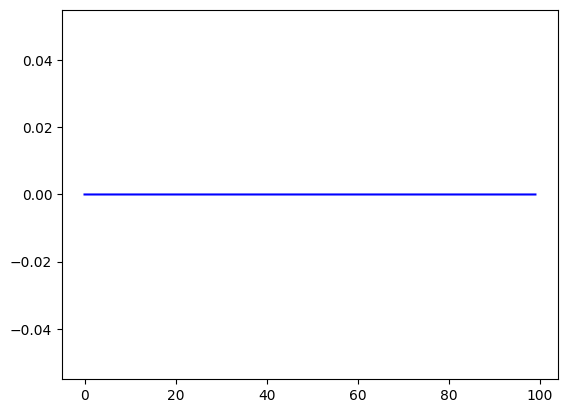

In [37]:
plt.plot(history[:,0], history[:,2], "b", label="訓練")